# SCAMP Cohort6 Data Science Technical Assessment  

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#description">Data Description</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis and Visualization</a></li>
<li><a href="#conclusions">Conclusion: Which industry has the highest number of fake job postings?</a></li>
</ul>

<a id='intro'></a>
## Introduction
The given dataset contains a collection of job postings, some of which are fraudulent. The data contains textual & meta info about these jobs. This goal of this analysis is:
* To study the details of the dataset and 
* To find out which industry has the highest number of fake job postings

<a id='description'></a>
### Data Description
* job_id - Unique Job ID
* title - The title of the job ad entry.
* location - Geographical location of the job ad.
* department - Corporate department (e.g. sales).
* salary_range - Indicative salary range
* company_profile - A brief company description.
* description - The details description of the job ad.
* requirements - Enlisted requirements for the job opening.
* benefits - Enlisted offered benefits by the employer.
* telecommuting - True for telecommuting positions.
* has_company_logo - True if company logo is present.
* has_questions - True if screening questions are present.
* employment_type - Full-type, Part-time, Contract, etc.
* required_experience - Executive, Entry level, Intern, etc.
* required_education - Doctorate, Master’s Degree, Bachelor, etc.
* industry - Automotive, IT, Health care, Real estate, etc.
* function - Consulting, Engineering, Research, Sales etc.
* fraudulent - target - Classification attribute.

<a id='wrangling'></a>
### Data Wrangling

In this step, I will clean the data for analysis by handling missing values and filtering information, if needed.

In [1]:
# import required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
job_postings_df = pd.read_csv("fake_job_postings.csv")

In [3]:
# View first 3 rows of dataset 
job_postings_df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# print shape of the dataset
job_postings_df.shape

(17880, 18)

In [5]:
# view columns of the dataset
job_postings_df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
# print information about the dataset
job_postings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
# View the number of unique values in each column in the dataset
job_postings_df.nunique().sort_values() 

fraudulent                 2
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
function                  37
industry                 131
salary_range             874
department              1337
company_profile         1709
location                3105
benefits                6205
title                  11231
requirements           11968
description            14801
job_id                 17880
dtype: int64

In [8]:
job_postings_df_1 = job_postings_df.copy()

In [9]:
# View percentage of missing values in each column
missing_percentage = round(job_postings_df_1.isna().sum() * 100 / job_postings_df_1.shape[0], 3).sort_values() 
missing_percentage

job_id                  0.000
has_questions           0.000
has_company_logo        0.000
telecommuting           0.000
fraudulent              0.000
title                   0.000
description             0.006
location                1.935
requirements           15.073
company_profile        18.501
employment_type        19.413
industry               27.422
function               36.102
required_experience    39.430
benefits               40.324
required_education     45.330
department             64.581
salary_range           83.960
dtype: float64

In [10]:
# drop columns with more than 50% of missing values and job_id column since it doesn't contain any information
job_postings_df_1 = job_postings_df_1.drop(["department", "salary_range", "job_id"], axis = 1)

In [11]:
# clean location feature
## the location feature is in the form Country, State, and City and I'll be using just the country and city for analysis
job_postings_df_2 = job_postings_df_1.copy()

In [12]:
# extract country column from location 
job_postings_df_2["country"] = job_postings_df_2["location"].str.split(', ', expand = True)[0]

In [13]:
# extract country column from location 
job_postings_df_2["city"] = job_postings_df_2["location"].str.split(', ', expand = True)[2]

In [14]:
# load a dataset for country names
country_abbreviations_df = pd.read_csv("country_abbreviations.csv")
country_abbreviations_df.head(3)

,Country,country
0,Afghanistan,AF
1,Aland Islands,AX
2,Albania,AL


In [15]:
# merge country abbreviation dataset to job postings dataset
job_postings_df_3 = job_postings_df_2.merge(country_abbreviations_df, how = 'left', on = ['country'])
job_postings_df_3 = job_postings_df_3.drop("country", axis = 1)
job_postings_df_3 = job_postings_df_3.rename(columns = {"Country": "country"})

In [16]:
# view first 3 rows of the new dataset
job_postings_df_3 = job_postings_df_3.drop("location", axis = 1)
job_postings_df_3.head(3)

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,New York,United States of America
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,Auckland,New Zealand
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,Wever,United States of America


In [17]:
# Clean text Features
## Text features are features describing the textual components of the job post

job_postings_df_4 = job_postings_df_3.copy()
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for column in text_columns:
    job_postings_df_4[column].fillna('', inplace = True)

job_postings_df_4['text'] = job_postings_df_4['title'] + ' ' + \
                            job_postings_df_4['company_profile'] + ' ' + \
                            job_postings_df_4['description'] + ' ' + \
                            job_postings_df_4['requirements'] + ' ' + \
                            job_postings_df_4['benefits']

job_postings_df_4 = job_postings_df_4.drop(['title', 'company_profile', 'description', 'requirements', 'benefits'], axis = 1)

In [18]:
# drop the remaining rows with null values
job_postings_df_5 = job_postings_df_4.copy()
job_postings_df_5.dropna(inplace = True)

In [19]:
# confirm there are no null values in the dataset
any(job_postings_df_5.isna().sum() > 0)

False

In [20]:
# clean required_education column
job_postings_df_6 = job_postings_df_5.copy()
job_postings_df_6["required_education"] = job_postings_df_6["required_education"].replace(['High School or equivalent',
                                                                                                     'Some College Coursework Completed',
                                                                                                     'Certification',
                                                                                                     'Some High School Coursework'], "Less than a Bachelor's Degree")

job_postings_df_6["required_education"] = job_postings_df_6["required_education"].replace(['Vocational',
                                                                                                     'Vocational - Degree',
                                                                                                     'Vocational - HS Diploma'], "Vocational Degree")

job_postings_df_6["required_education"] = job_postings_df_6["required_education"].replace(['Doctorate',
                                                                                                     'Professional'], "Professional degree")

In [21]:
# rename values in telecommuting, has_company_logo, has_questions, and fraudulent column
job_postings_df_6["telecommuting"] = job_postings_df_6["telecommuting"].replace(1, 'Has Telecommuting positions')
job_postings_df_6["telecommuting"] = job_postings_df_6["telecommuting"].replace(0, 'No telecommuting positions')

job_postings_df_6["has_company_logo"] = job_postings_df_6["has_company_logo"].replace(1, 'Company logo present')
job_postings_df_6["has_company_logo"] = job_postings_df_6["has_company_logo"].replace(0, 'Company logo absent')

job_postings_df_6["has_questions"] = job_postings_df_6["has_questions"].replace(1, 'Screening questions present')
job_postings_df_6["has_questions"] = job_postings_df_6["has_questions"].replace(0, 'Screening questions absent')

job_postings_df_6["fraudulent"] = job_postings_df_6["fraudulent"].replace(1, 'Fraudulent')
job_postings_df_6["fraudulent"] = job_postings_df_6["fraudulent"].replace(0, 'Not Fraudulent')

In [22]:
# view the cleaned dataset
job_postings_df_6.head(2)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country,text
3,No telecommuting positions,Company logo present,Screening questions absent,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,Not Fraudulent,Washington,United States of America,Account Executive - Washington DC Our passion ...
4,No telecommuting positions,Company logo present,Screening questions present,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,Not Fraudulent,Fort Worth,United States of America,Bill Review Manager SpotSource Solutions LLC i...


<a id='eda'></a>
### Exploratory Data Analysis

In this step, I will perform univariate and bivariate analysis to understand the variables in the dataset, and how they relate to fraudulent job postings. Then, I will ask interesing questions to understand better how these variables relate to job postings, and to detect patterns from these relations.

#### Univariate Analysis

Text(0.5, 1.0, 'Job Posting Fraudulent Status')

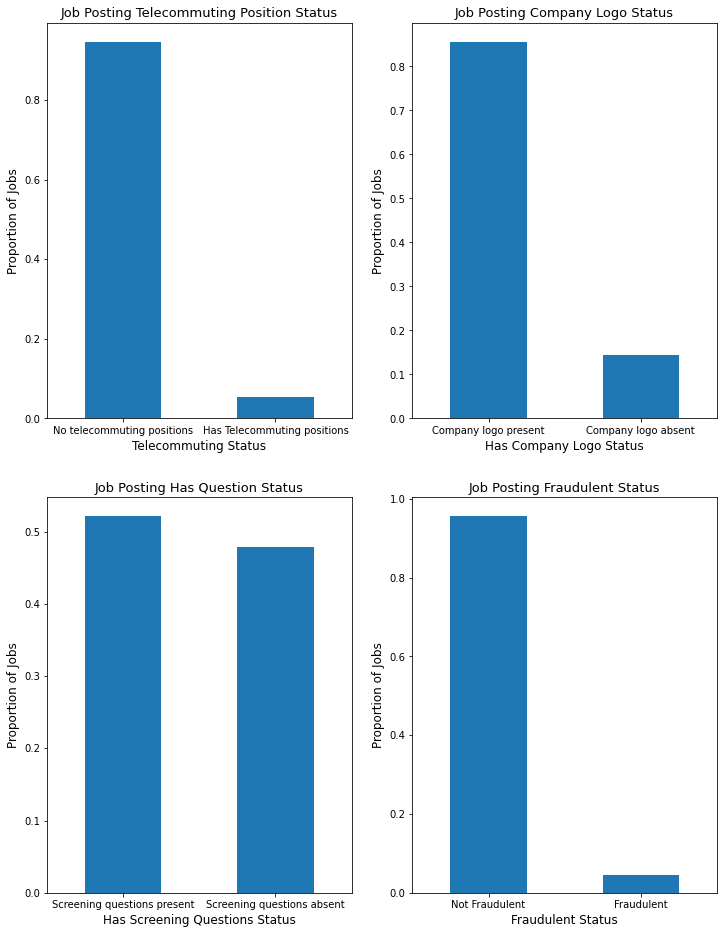

In [23]:
# Visualize independent categorical features
plt.figure(figsize = (12, 16)) 

plt.subplot(221)
job_postings_df_6['telecommuting'].value_counts(normalize = True).plot(kind = "bar", rot = 0) 
plt.xlabel("Telecommuting Status", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Job Posting Telecommuting Position Status", size = 13)

plt.subplot(222)
job_postings_df_6['has_company_logo'].value_counts(normalize = True).plot(kind = "bar", rot = 0)
plt.xlabel("Has Company Logo Status", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Job Posting Company Logo Status", size = 13)

plt.subplot(223)
job_postings_df_6['has_questions'].value_counts(normalize = True).plot(kind = "bar", rot = 0)
plt.xlabel("Has Screening Questions Status", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Job Posting Has Question Status", size = 13)

plt.subplot(224)
job_postings_df_6['fraudulent'].value_counts(normalize = True).plot(kind = "bar", rot = 0)
plt.xlabel("Fraudulent Status", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Job Posting Fraudulent Status", size = 13)

It appears that:
1. the number of job postings with telecommuting postions is far less than the ones without telecommuting positions
2. many job postings have company logo present
3. the number of fake job postings is significantly low compared to real job postings

Text(0.5, 1.0, "Job Posting's Required Education")

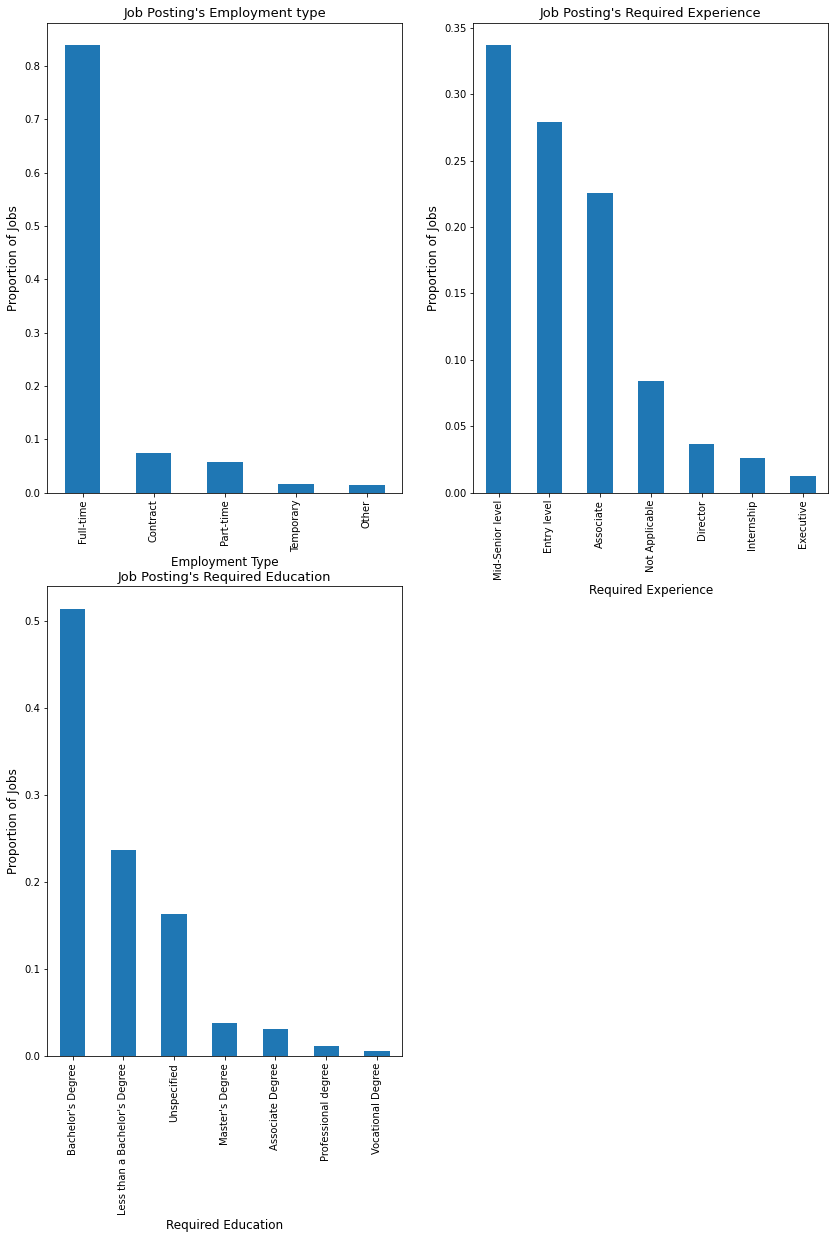

In [24]:
# Visualize independent ordinal features
plt.figure(figsize = (14, 19)) 

plt.subplot(221)
job_postings_df_6['employment_type'].value_counts(normalize = True).plot(kind = "bar")
plt.xlabel("Employment Type", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Job Posting's Employment type", size = 13)

plt.subplot(222)
job_postings_df_6['required_experience'].value_counts(normalize = True).plot(kind = "bar")
plt.xlabel("Required Experience", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Job Posting's Required Experience", size = 13)

plt.subplot(223)
job_postings_df_6['required_education'].value_counts(normalize = True).plot(kind = "bar")
plt.xlabel("Required Education", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Job Posting's Required Education", size = 13)

It can be inferred from the plots above that:
1. there are more Full-time job postings than any other employment type
2. the required experience for most job postings is Mid-Senior level and Entry level
3. the required education for most job postings is a Bachelor's Degree

Text(0.5, 1.0, 'Top 15 Industries with Job Postings')

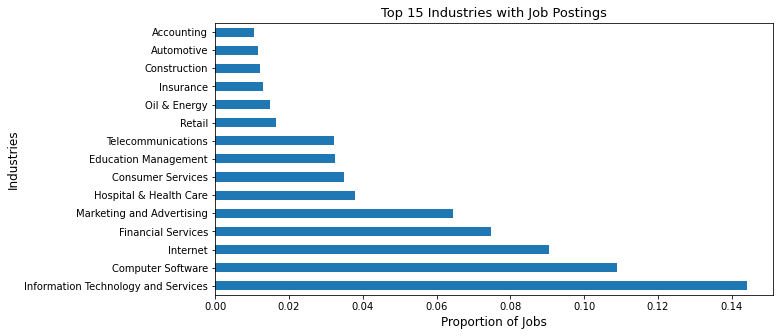

In [25]:
# Visualize other independent categorical features
plt.figure(figsize = (10, 5)) 
job_postings_df_6['industry'].value_counts(normalize = True).nlargest(15).plot(kind = "barh")
plt.xlabel("Proportion of Jobs", size = 12)
plt.ylabel("Industries", size = 12)
plt.title("Top 15 Industries with Job Postings", size = 13)

It seems the tech industry followed by the marketing industry have the most job postings.

Text(0.5, 1.0, 'Top 15 Functions with Job Postings')

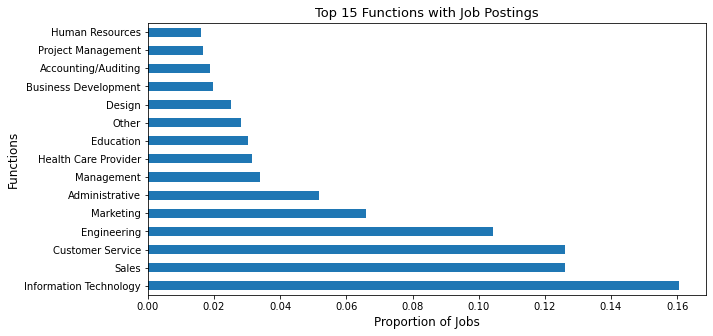

In [26]:
# Visualize other independent categorical features
plt.figure(figsize = (10, 5)) 

job_postings_df_6['function'].value_counts(normalize = True).nlargest(15).plot(kind = "barh")
plt.xlabel("Proportion of Jobs", size = 12)
plt.ylabel("Functions", size = 12)
plt.title("Top 15 Functions with Job Postings", size = 13)

Technology and Marketing have the most job postings.

Text(0.5, 1.0, 'Top 15 Countries  with Job Postings')

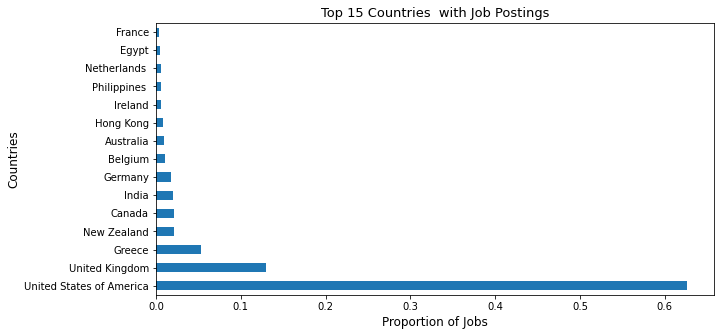

In [27]:
# Visualize other independent categorical features
plt.figure(figsize = (10, 5)) 

job_postings_df_6['country'].value_counts(normalize = True).nlargest(15).plot(kind = "barh")
plt.xlabel("Proportion of Jobs", size = 12)
plt.ylabel("Countries", size = 12)
plt.title("Top 15 Countries  with Job Postings", size = 13)

The US is the country with the most job postings

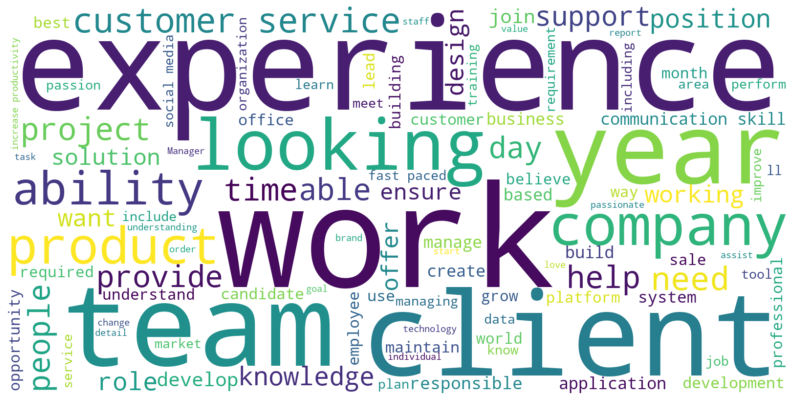

In [28]:
# Visualize most frequent words
plt.figure(figsize = (14, 11))
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
wc = WordCloud(min_font_size = 3, max_words = 100, width = 1600, height = 800, background_color = "white", stopwords = STOPWORDS).generate(str(" ".join(job_postings_df_6.text)))

plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off");

Some of the most frequent words used in job postings are experience, team, work and client.

#### Bivariate Analysis
I have already gained some insight about fraudulent job postings and the dataset in general, by exploring individual components of the dataset. Now, I will ask some specific question, and try to answer them.

##### Q1: Do fraudulent jobs have telecommuting positions?

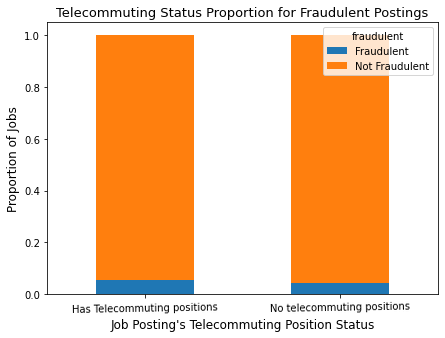

In [29]:
# Telecommuting position status vs Fraudulent jobs status
Telecommuting = pd.crosstab(job_postings_df_6["telecommuting"], job_postings_df_6["fraudulent"])

Telecommuting.div(Telecommuting.sum(1).astype(float), axis = 0).plot(kind = "bar", rot = True,  stacked = True, figsize = (7, 5))
plt.xlabel("Job Posting's Telecommuting Position Status", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Telecommuting Status Proportion for Fraudulent Postings", size = 13)
plt.show();

###### Conclusion: The proportion of fraudulent jobs with Telecommuting Positions is slightly more than the proportion of fraudulent jobs without Telecommuting Positions. 

##### Q2. Do fraudulent job postings have company logo?

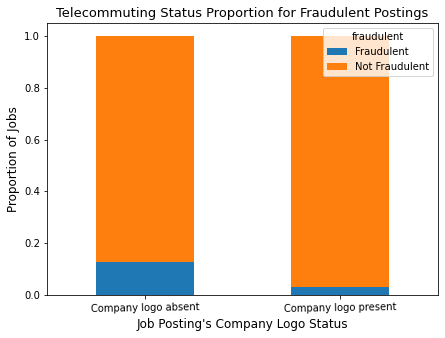

In [30]:
# Has Company Logo status vs Fraudulent jobs status
Has_company_logo = pd.crosstab(job_postings_df_6["has_company_logo"], job_postings_df_6["fraudulent"])

Has_company_logo.div(Has_company_logo.sum(1).astype(float), axis = 0).plot(kind = "bar",  rot = True, stacked = True, figsize = (7, 5))
plt.xlabel("Job Posting's Company Logo Status", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Telecommuting Status Proportion for Fraudulent Postings", size = 13)
plt.show();

###### Conclusion: The proportion of fraudulent job postings without Company Logo is more than the proportion of fraudulent job postings with Company Logo

###### Q3. Do fraudulent jobs have screening questions?

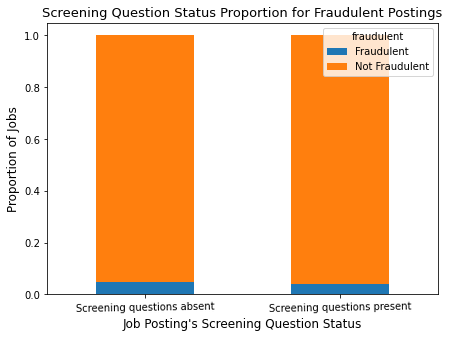

In [31]:
# Has Screening questions status vs Fraudulent jobs status
Has_questions = pd.crosstab(job_postings_df_6["has_questions"], job_postings_df_6["fraudulent"])

Has_questions.div(Has_questions.sum(1).astype(float), axis = 0).plot(kind = "bar",  rot = True, stacked = True, figsize = (7, 5))
plt.xlabel("Job Posting's Screening Question Status", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Screening Question Status Proportion for Fraudulent Postings", size = 13)
plt.show();

###### Conclusion: The proportion of fraudulent job postings without Screening Questions is slightly more than the proportion of fraudulent job postings with Screening Questions

#### Q4. What employment type is common to most fradulent jobs?

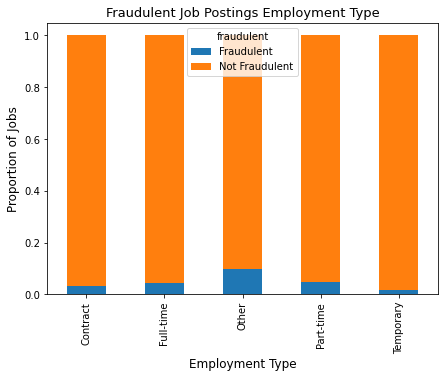

In [32]:
# Employment type status vs Fraudulent jobs status
Employment_type = pd.crosstab(job_postings_df_6["employment_type"], job_postings_df_6["fraudulent"])

Employment_type.div(Employment_type.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (7, 5))
plt.xlabel("Employment Type", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Fraudulent Job Postings Employment Type", size = 13)
plt.show();

###### Conclusion: The proportion of fraudulent job postings with Employment Type "not stated clearly" is more than the proportion of fraudulent job postings with Employment Type "stated clearly" i.e. Full-time, Part-time etc.

##### Q5. What type of experience and education is required in fraudulent jobs?

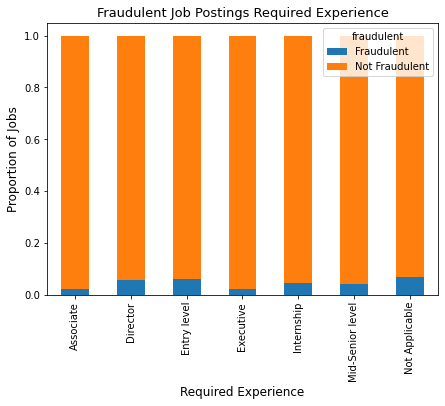

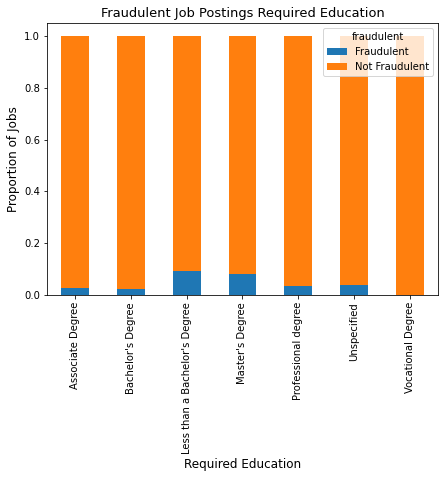

In [33]:
# Required experience vs Fraudulent jobs status
Required_experience = pd.crosstab(job_postings_df_6["required_experience"], job_postings_df_6["fraudulent"])
Required_experience.div(Required_experience.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (7, 5))
plt.xlabel("Required Experience", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Fraudulent Job Postings Required Experience", size = 13)
plt.show();

# Required education vs Fraudulent jobs status
Required_education = pd.crosstab(job_postings_df_6["required_education"], job_postings_df_6["fraudulent"])
Required_education.div(Required_education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (7, 5))
plt.xlabel("Required Education", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Fraudulent Job Postings Required Education", size = 13)
plt.show();

###### Conclusion:  The Required Education for most fraudulent job postings is "Less than a Bacheolor's Degree" and the Required Experience for most fraudulent is "Entry Level"  and "Not Applicable"

##### Q6. Which top industries have the most fraudulent jobs?

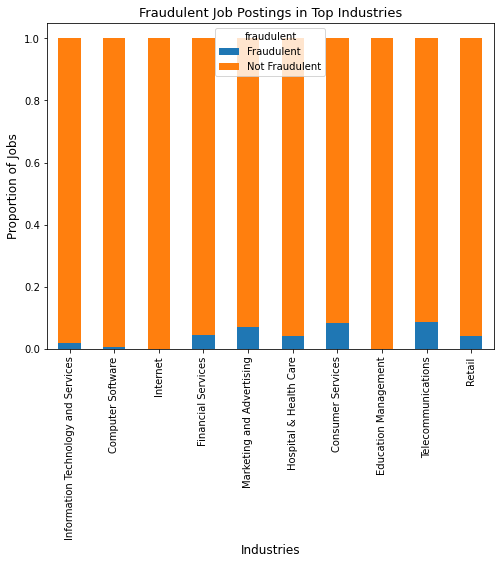

In [34]:
# Top industries vs Fraudulent job postings
top_10_indusries = list(job_postings_df_6['industry'].value_counts(normalize = True).nlargest(10).index)
Industry = (pd.crosstab(job_postings_df_6["industry"], job_postings_df_6["fraudulent"])).T
Top_10_indusries = Industry[top_10_indusries].T

Top_10_indusries.div(Top_10_indusries.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (8, 6))
plt.xlabel("Industries", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Fraudulent Job Postings in Top Industries", size = 13)
plt.show();

###### Conclusion: The Top Industries with the most fraudulent jobs are Consumer Services and Telecommunications

##### Q7. Which top countries have the most fraudulent jobs?

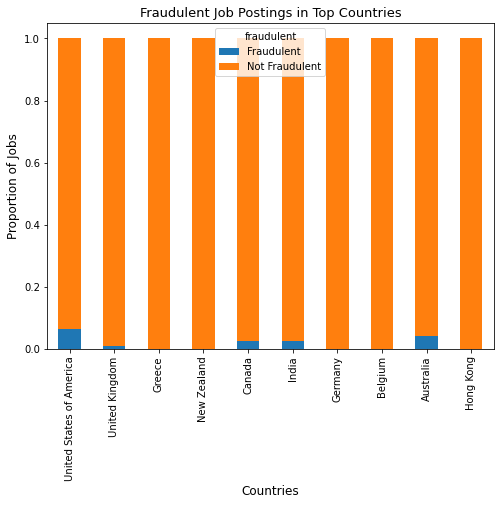

In [35]:
# Top industries vs Fraudulent job postings
top_10_countries = list(job_postings_df_6['country'].value_counts(normalize = True).nlargest(10).index)
Country = (pd.crosstab(job_postings_df_6["country"], job_postings_df_6["fraudulent"])).T
Top_10_countries = Country[top_10_countries].T

Top_10_countries.div(Top_10_countries.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (8, 6))
plt.xlabel("Countries", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Fraudulent Job Postings in Top Countries", size = 13)
plt.show();

###### Conclusion: The Top Countries with the most fraudulent jobs are US and Australia

###### Q8. Which top functions have the most fraudulent jobs?

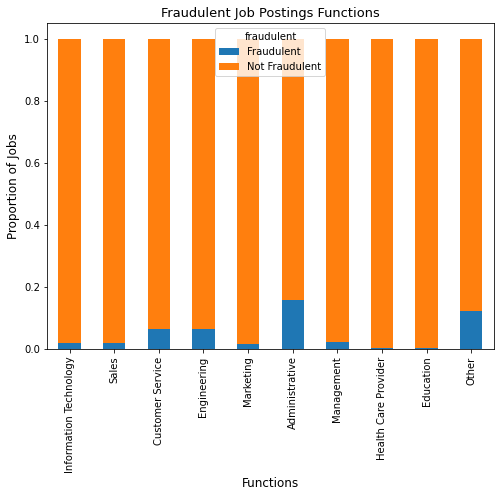

In [36]:
# Top functions vs Fraudulent job postings
top_10_functions = list(job_postings_df_6['function'].value_counts(normalize = True).nlargest(10).index)
Function = (pd.crosstab(job_postings_df_6["function"], job_postings_df_6["fraudulent"])).T
Top_10_functions = Function[top_10_functions].T

Top_10_functions.div(Top_10_functions.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (8, 6))
plt.xlabel("Functions", size = 12)
plt.ylabel("Proportion of Jobs", size = 12)
plt.title("Fraudulent Job Postings Functions", size = 13)
plt.show();

###### Conclusion: The Top Function with the most fraudulent job is Administrative

##### Q9. Which words are frequent in fake job postings?

In [37]:
# texts for real job postings
fake_jobs_text = job_postings_df_6[job_postings_df_6.fraudulent == "Fraudulent"].text
fake_jobs_text[:2]

98     IC&E Technician                               ...
215    IC&E Technician Mt Poso                       ...
Name: text, dtype: object

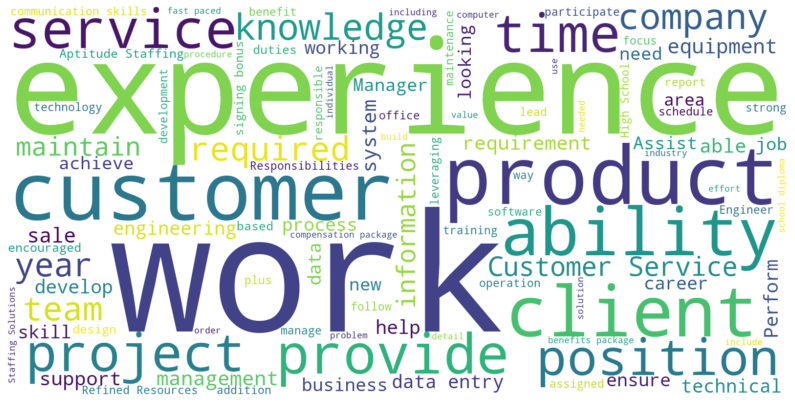

In [38]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (14, 11))
wc = WordCloud(min_font_size = 3, max_words = 100, width = 1600, height = 800, background_color = "white", stopwords = STOPWORDS).generate(str(" ".join(fake_jobs_text)))

plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off");

###### Conclusion: The most frequent words used to describe fraudulent job postings is work, experience, product and customer.

##### Q10. Which country has the highest number of fake job postings?

Text(0.5, 1.0, 'Top 15 Countries with Fake Job Postings')

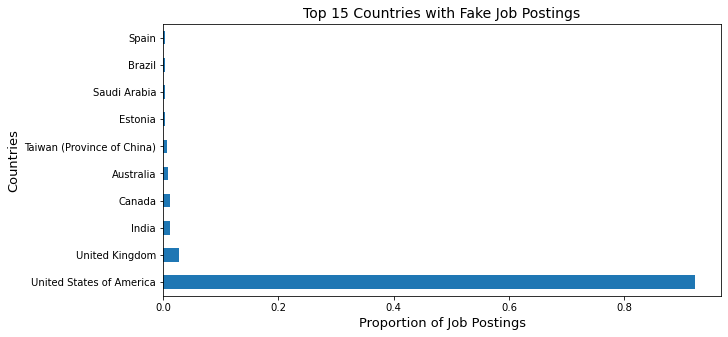

In [39]:
# Which country has the highest number of fake job postings?
US_fake_job_postings = job_postings_df_6[job_postings_df_6["fraudulent"] == "Fraudulent"]

plt.figure(figsize = (10, 5)) 
US_fake_job_postings['country'].value_counts(normalize = True).nlargest(15).plot(kind = "barh")
plt.xlabel("Proportion of Job Postings", size = 13)
plt.ylabel("Countries", size = 13)
plt.title("Top 15 Countries with Fake Job Postings", size = 14)

###### Conclusion: The country with the most frequent job postings is the US

##### Q11. Which industry in the US has the highest number of fake job postings?

Text(0.5, 1.0, 'Top 15 Industries in the US with Fake Job Postings')

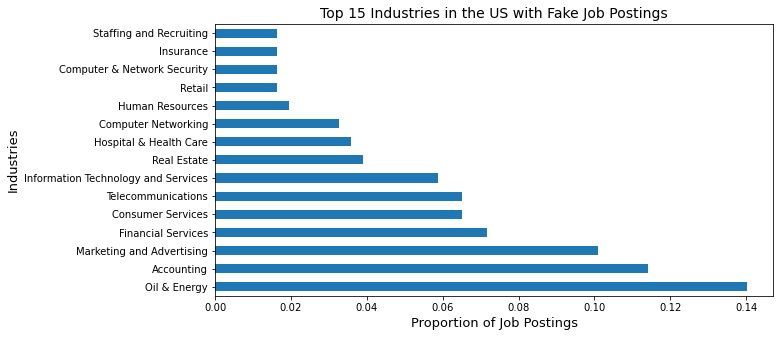

In [40]:
# Which industry in the US has the highest number of fake job postings?
US_fake_job_postings = job_postings_df_6[(job_postings_df_6["fraudulent"] == "Fraudulent") & (job_postings_df_6["country"] == "United States of America")]

plt.figure(figsize = (10, 5)) 
US_fake_job_postings['industry'].value_counts(normalize = True).nlargest(15).plot(kind = "barh")
plt.xlabel("Proportion of Job Postings", size = 13)
plt.ylabel("Industries", size = 13)
plt.title("Top 15 Industries in the US with Fake Job Postings", size = 14)

###### Conclusion: The Industry in the US with the most number of fraudulent job postings

##### Q11. The City in the US has the most fraudulent job postings?

Text(0.5, 1.0, 'Top 15 Cities in the US with Fake Job Postings')

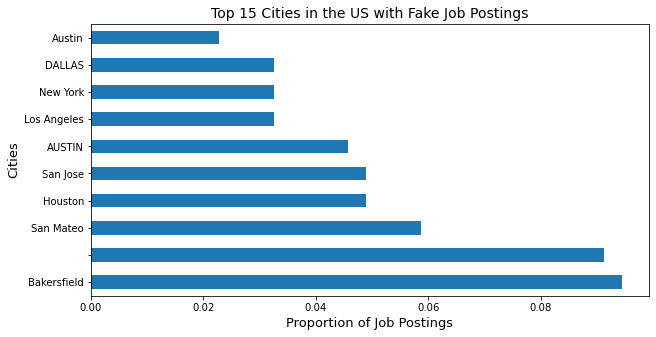

In [41]:
# Which city in the US has the highest number of fake job postings?
US_Cities_fake_job_postings = job_postings_df_6[(job_postings_df_6["fraudulent"] == "Fraudulent") & (job_postings_df_6["country"] == "United States of America")]

plt.figure(figsize = (10, 5)) 
US_Cities_fake_job_postings['city'].value_counts(normalize = True).nlargest(10).plot(kind = "barh")
plt.xlabel("Proportion of Job Postings", size = 13)
plt.ylabel("Cities", size = 13)
plt.title("Top 15 Cities in the US with Fake Job Postings", size = 14)

###### Conclusion: The Cities in the US with the most fraudulent job postings are in Texas and California, which is understandable because these two states produce a lot of oil and gas.

<a id='conclusions'></a>
### Conclusion: Which industry has the highest number of fake job postings?

Text(0.5, 1.0, 'Top 10 Industries with Fake Job Postings')

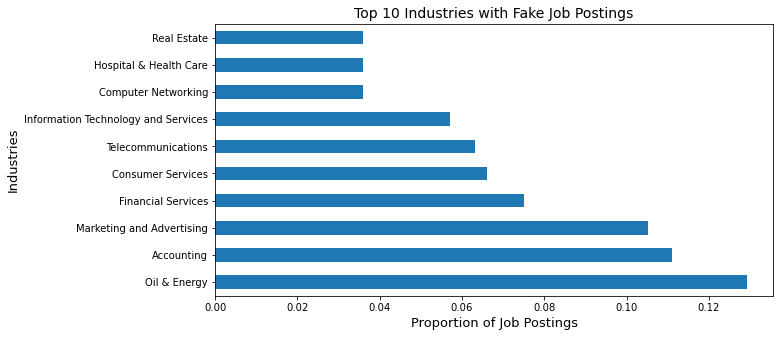

In [42]:
# Which industry has the highest number of fake job postings?
fake_job_postings = job_postings_df_6[job_postings_df_6["fraudulent"] == "Fraudulent"]

plt.figure(figsize = (10, 5)) 
fake_job_postings['industry'].value_counts(normalize = True).nlargest(10).plot(kind = "barh")
plt.xlabel("Proportion of Job Postings", size = 13)
plt.ylabel("Industries", size = 13)
plt.title("Top 10 Industries with Fake Job Postings", size = 14)

#### The industry with the highest number of job postings is the Oil and Energy Industry.